# 🍷 Challenge 1: Wine Quality Prediction AI Project - Educational Notebook

## 🎯 Theme: AI for Quality Assessment and Decision-Making in Agriculture and Food Industry

Welcome to Challenge 1! You'll build an intelligent wine quality prediction system that helps wineries maintain consistent quality standards and optimize their production processes. This challenge explores how AI can augment human expertise in specialized domains while understanding the complex relationships between chemical properties and wine quality.

## 📖 What You'll Learn
- **Regression vs Classification**: Build models for both numerical scores and categorical predictions
- **Feature Engineering**: Understand relationships between chemical properties
- **Exploratory Data Analysis**: Discover patterns in wine chemistry data
- **Model Evaluation**: Compare different algorithms and interpret performance
- **Imbalanced Data Handling**: Work with realistic quality distributions
- **Domain Knowledge Integration**: Combine AI with expert wine knowledge

## 🗂️ Dataset Overview
You'll work with a real wine quality dataset containing:
- **Chemical Properties**: 11 physicochemical features (acidity, sugar, alcohol, etc.)
- **Wine Types**: Red and white wine samples
- **Quality Scores**: Expert ratings from 4-6 scale
- **Quality Categories**: Poor, Average, and Good classifications

**Real-World Impact**: This system could help wineries:
- Automate quality control processes
- Reduce dependence on expensive expert tasters
- Maintain consistent quality standards
- Optimize production parameters for better quality

## 🚀 Challenge Roadmap
Follow these steps to build your wine quality predictor:

1. **📊 Data Exploration**: Understand wine chemistry and quality distributions
2. **🔬 Chemical Analysis**: Analyze relationships between chemical properties
3. **📈 Feature Engineering**: Create meaningful features from chemical data
4. **🤖 Model Building**: Build both regression and classification models
5. **📊 Model Evaluation**: Compare algorithms and interpret performance
6. **🎯 Business Insights**: Extract actionable insights for winemakers
7. **💭 Ethical Considerations**: Consider AI's role in traditional industries

---

## 💡 **Key Insight**: 
Wine quality prediction isn't just about accuracy - it's about creating interpretable models that complement human expertise and respect traditional wine-making knowledge while providing objective, consistent quality assessment.

---

Let's start our wine quality prediction journey! 🍷

### Task 1: Load and Explore the Wine Quality Dataset

**🎯 Goal**: Understand your wine dataset and the chemistry behind wine quality

**📝 What to do**:
- Load the wine quality dataset
- Examine the structure and understand each chemical property
- Analyze quality distributions and wine type differences
- Visualize key relationships between features

**💡 Key Questions to Consider**:
- What chemical properties are most important for wine quality?
- How are red and white wines different in their chemical composition?
- What's the distribution of quality scores in our dataset?
- Are there any missing values or data quality issues?

Let's start by importing the necessary libraries and loading our dataset:

In [1]:
# Import essential libraries for data analysis and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print("🍷 Ready to analyze wine quality data!")

📚 Libraries imported successfully!
🍷 Ready to analyze wine quality data!


In [2]:
# Load the wine quality dataset
print("🍷 Loading wine quality dataset...")

# Primary method: Download from GitHub (works in both Colab and local environments)
github_url = "https://raw.githubusercontent.com/BridgingAISocietySummerSchools/Coding-Project/main/challenge_1/data/WineQT.csv"

try:
    # Try loading from GitHub first (recommended for Colab)
    df = pd.read_csv(github_url)
    print("✅ Loaded from GitHub repository")
except Exception as e:
    print(f"⚠️ GitHub download failed: {e}")
    
    # Fallback: Try local file system
    try:
        df = pd.read_csv('../data/WineQT.csv')
        print("✅ Loaded from local file system")
    except FileNotFoundError:
        print("❌ Local file not found either.")
        print("\n📋 Alternative options for Google Colab:")
        print("Option 1: Upload file directly")
        print("  from google.colab import files")
        print("  uploaded = files.upload()")
        print("  df = pd.read_csv('WineQT.csv')")
        print("\nOption 2: Mount Google Drive")
        print("  from google.colab import drive")
        print("  drive.mount('/content/drive')")
        print("  df = pd.read_csv('/content/drive/MyDrive/path/to/WineQT.csv')")
        raise

# Display basic information about the dataset
print(f"📊 Dataset Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")
print("\n" + "="*50)
print("🔍 DATASET OVERVIEW")
print("="*50)

# Show first few rows
print("\n📋 First 5 wine samples:")
display(df.head())

# Dataset info
print("\n📊 Dataset Information:")
print(df.info())

# Statistical summary
print("\n📈 Statistical Summary:")
display(df.describe())

# Check for missing values
print(f"\n❓ Missing values: {df.isnull().sum().sum()}")

print("\n✅ Wine quality dataset loaded successfully!")
print(f"🍷 Ready to analyze {len(df)} wine samples!")

🍷 Loading wine quality dataset...
✅ Loaded from GitHub repository
📊 Dataset Shape: (1143, 13)
📋 Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']

🔍 DATASET OVERVIEW

📋 First 5 wine samples:
✅ Loaded from GitHub repository
📊 Dataset Shape: (1143, 13)
📋 Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']

🔍 DATASET OVERVIEW

📋 First 5 wine samples:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

📈 Statistical Summary:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000



❓ Missing values: 0

✅ Wine quality dataset loaded successfully!
🍷 Ready to analyze 1143 wine samples!


### Task 2: Chemical Properties Analysis

**🎯 Goal**: Understand the chemistry behind wine quality

**📝 What to do**:
- Analyze each chemical property and its role in wine quality
- Explore correlations between different chemical features
- Understand the distribution of each chemical property
- Identify potential outliers or unusual patterns

**🧪 Wine Chemistry Guide**:
- **Fixed Acidity**: Tartaric acid (affects taste and preservation)
- **Volatile Acidity**: Acetic acid (vinegar taste in high amounts)
- **Citric Acid**: Adds freshness and flavor complexity
- **Residual Sugar**: Sweetness level after fermentation
- **Chlorides**: Salt concentration (affects taste balance)
- **Sulfur Dioxide**: Preservative preventing microbial growth
- **Density**: Related to alcohol and sugar content
- **pH**: Acidity level affecting taste and stability
- **Sulphates**: Antioxidant and preservative
- **Alcohol**: Alcohol percentage by volume

Let's dive into the chemistry! 🧪

🎯 WINE QUALITY ANALYSIS

📊 Quality Score Distribution:
Quality 3:    6 wines (  0.5%)
Quality 4:   33 wines (  2.9%)
Quality 5:  483 wines ( 42.3%)
Quality 6:  462 wines ( 40.4%)
Quality 7:  143 wines ( 12.5%)
Quality 8:   16 wines (  1.4%)

📋 Quality Category Distribution:
Good    :  621 wines ( 54.3%)
Average :  483 wines ( 42.3%)
Poor    :   39 wines (  3.4%)

⚖️ Class Balance Analysis:
Balance Ratio: 0.06 (1.0 = perfectly balanced)
⚠️ Dataset is imbalanced - consider this in model evaluation


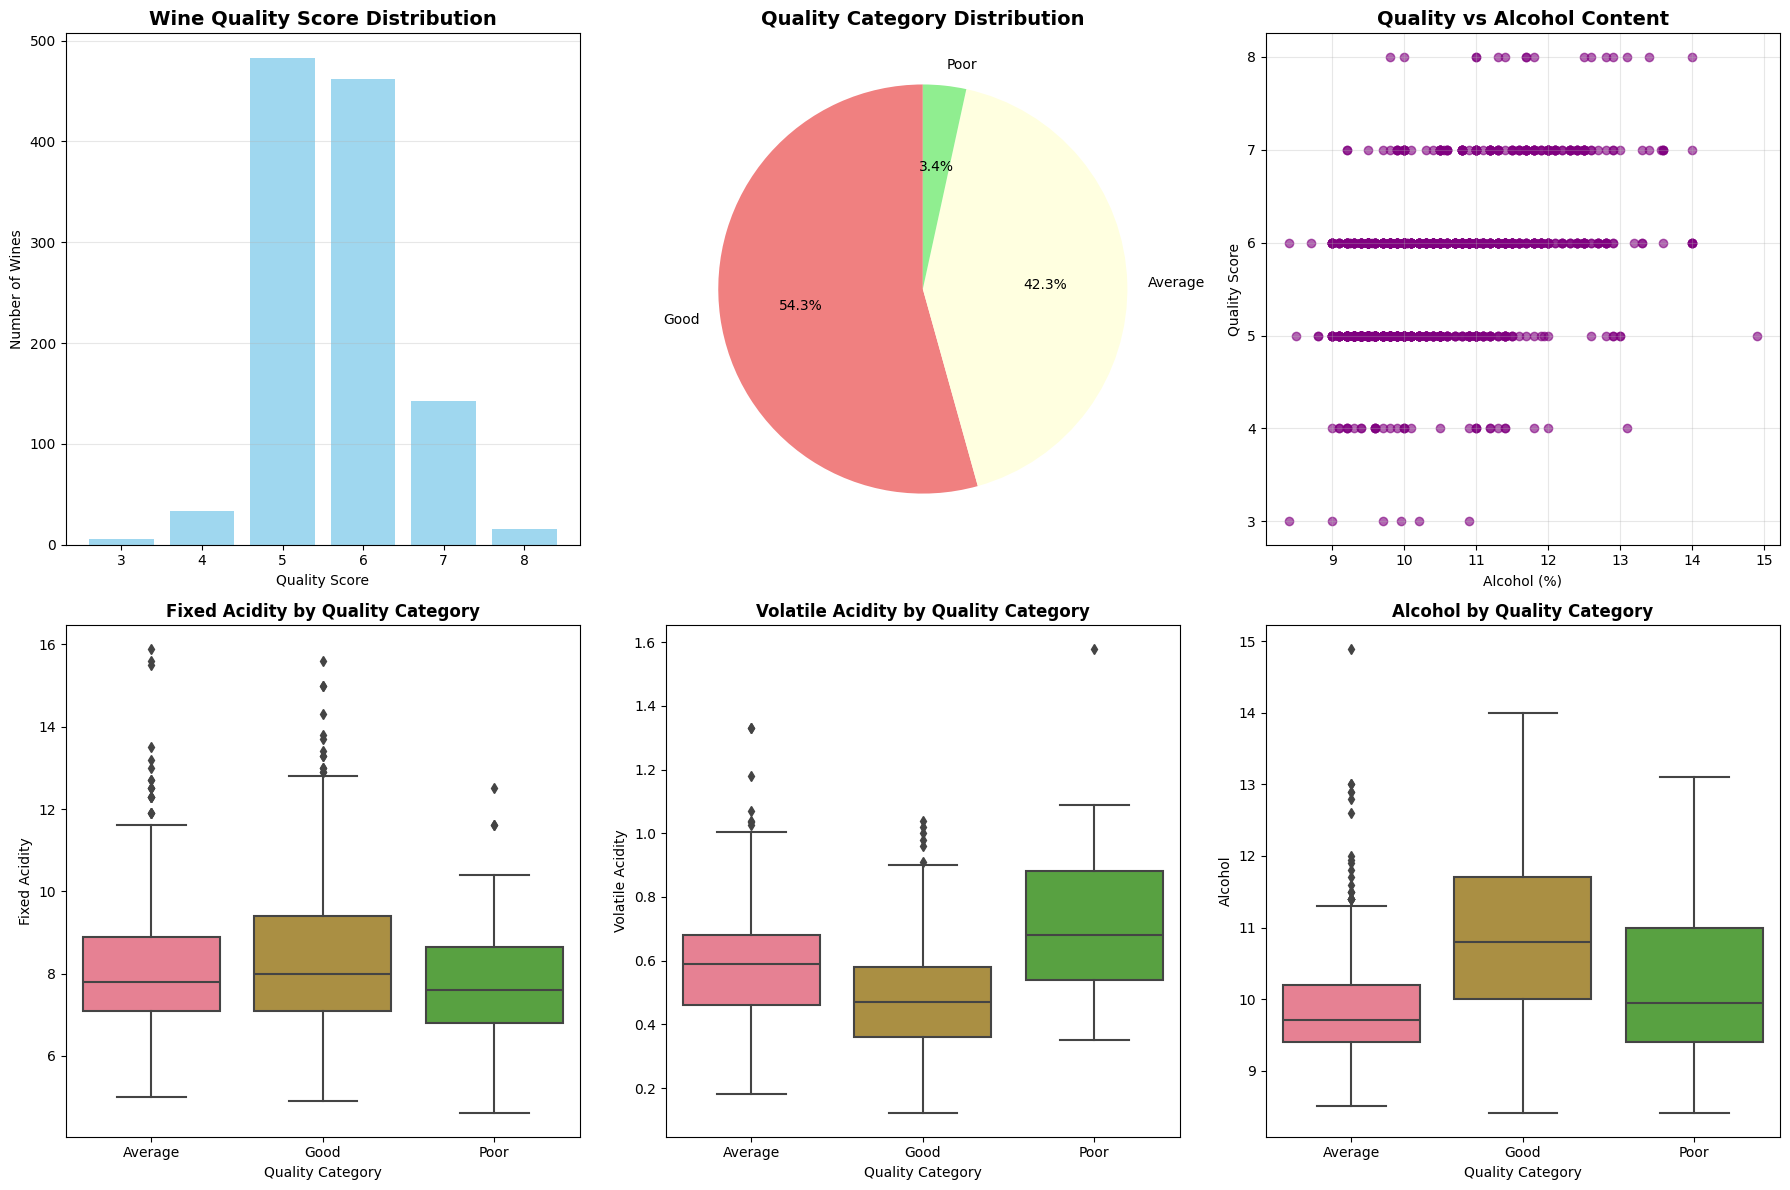


📈 STATISTICAL SUMMARY BY QUALITY CATEGORY:
                 fixed acidity        volatile acidity        citric acid  \
                          mean    std             mean    std        mean   
quality_category                                                            
Average                  8.161  1.558            0.585  0.168       0.240   
Good                     8.453  1.873            0.477  0.161       0.296   
Poor                     7.908  1.730            0.730  0.250       0.173   

                        residual sugar        chlorides         ...  \
                    std           mean    std      mean    std  ...   
quality_category                                                ...   
Average           0.180          2.540  1.436     0.092  0.052  ...   
Good              0.203          2.523  1.300     0.083  0.038  ...   
Poor              0.221          2.582  1.220     0.096  0.089  ...   

                 total sulfur dioxide         density            p

In [3]:
# 🎯 COMPREHENSIVE WINE QUALITY ANALYSIS
print("🎯 WINE QUALITY ANALYSIS")
print("="*50)

# Create quality categories for better analysis
def categorize_quality(quality):
    if quality <= 4:
        return 'Poor'
    elif quality <= 5:
        return 'Average'
    else:
        return 'Good'

df['quality_category'] = df['quality'].apply(categorize_quality)

# 1. Quality Distribution Analysis
print("\n📊 Quality Score Distribution:")
quality_counts = df['quality'].value_counts().sort_index()
for quality, count in quality_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Quality {quality}: {count:4d} wines ({percentage:5.1f}%)")

print("\n📋 Quality Category Distribution:")
category_counts = df['quality_category'].value_counts()
for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{category:8s}: {count:4d} wines ({percentage:5.1f}%)")

# 2. Class Balance Analysis
print(f"\n⚖️ Class Balance Analysis:")
min_count = category_counts.min()
max_count = category_counts.max()
balance_ratio = min_count / max_count
print(f"Balance Ratio: {balance_ratio:.2f} (1.0 = perfectly balanced)")
if balance_ratio < 0.5:
    print("⚠️ Dataset is imbalanced - consider this in model evaluation")
else:
    print("✅ Dataset is reasonably balanced")

# 3. Comprehensive Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Quality score distribution
axes[0, 0].bar(quality_counts.index, quality_counts.values, color='skyblue', alpha=0.8)
axes[0, 0].set_title('Wine Quality Score Distribution', fontweight='bold', fontsize=14)
axes[0, 0].set_xlabel('Quality Score')
axes[0, 0].set_ylabel('Number of Wines')
axes[0, 0].grid(axis='y', alpha=0.3)

# Quality category pie chart
colors = ['lightcoral', 'lightyellow', 'lightgreen']
axes[0, 1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[0, 1].set_title('Quality Category Distribution', fontweight='bold', fontsize=14)

# Quality vs Alcohol content
axes[0, 2].scatter(df['alcohol'], df['quality'], alpha=0.6, color='purple')
axes[0, 2].set_title('Quality vs Alcohol Content', fontweight='bold', fontsize=14)
axes[0, 2].set_xlabel('Alcohol (%)')
axes[0, 2].set_ylabel('Quality Score')
axes[0, 2].grid(True, alpha=0.3)

# Box plot of key chemical properties by quality category
key_properties = ['fixed acidity', 'volatile acidity', 'alcohol']
for i, prop in enumerate(key_properties):
    sns.boxplot(data=df, x='quality_category', y=prop, ax=axes[1, i])
    axes[1, i].set_title(f'{prop.title()} by Quality Category', fontweight='bold', fontsize=12)
    axes[1, i].set_xlabel('Quality Category')
    axes[1, i].set_ylabel(prop.title())

plt.tight_layout()
plt.show()

# 4. Statistical Summary by Quality Category
print("\n📈 STATISTICAL SUMMARY BY QUALITY CATEGORY:")
print("="*60)
chemical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                    'density', 'pH', 'sulphates', 'alcohol']

summary_stats = df.groupby('quality_category')[chemical_features].agg(['mean', 'std']).round(3)
print(summary_stats)

print("\n💡 Key Insights:")
print("-" * 20)

# Calculate mean alcohol content by quality
alcohol_by_quality = df.groupby('quality_category')['alcohol'].mean()
print(f"• Average Alcohol Content: Good({alcohol_by_quality['Good']:.1f}%) > Average({alcohol_by_quality['Average']:.1f}%) > Poor({alcohol_by_quality.get('Poor', 0):.1f}%)")

# Calculate mean volatile acidity by quality
va_by_quality = df.groupby('quality_category')['volatile acidity'].mean()
print(f"• Volatile Acidity Pattern: Poor({va_by_quality.get('Poor', 0):.3f}) > Average({va_by_quality['Average']:.3f}) > Good({va_by_quality['Good']:.3f})")

print(f"• Higher quality wines tend to have higher alcohol content and lower volatile acidity")
print(f"• This suggests alcohol enhances quality while volatile acidity (vinegar taste) reduces it")

🔬 FEATURE ENGINEERING & CORRELATION ANALYSIS
1. Creating Engineered Features...
-----------------------------------
✅ Created 8 new engineered features

2. Correlation Analysis
-------------------------


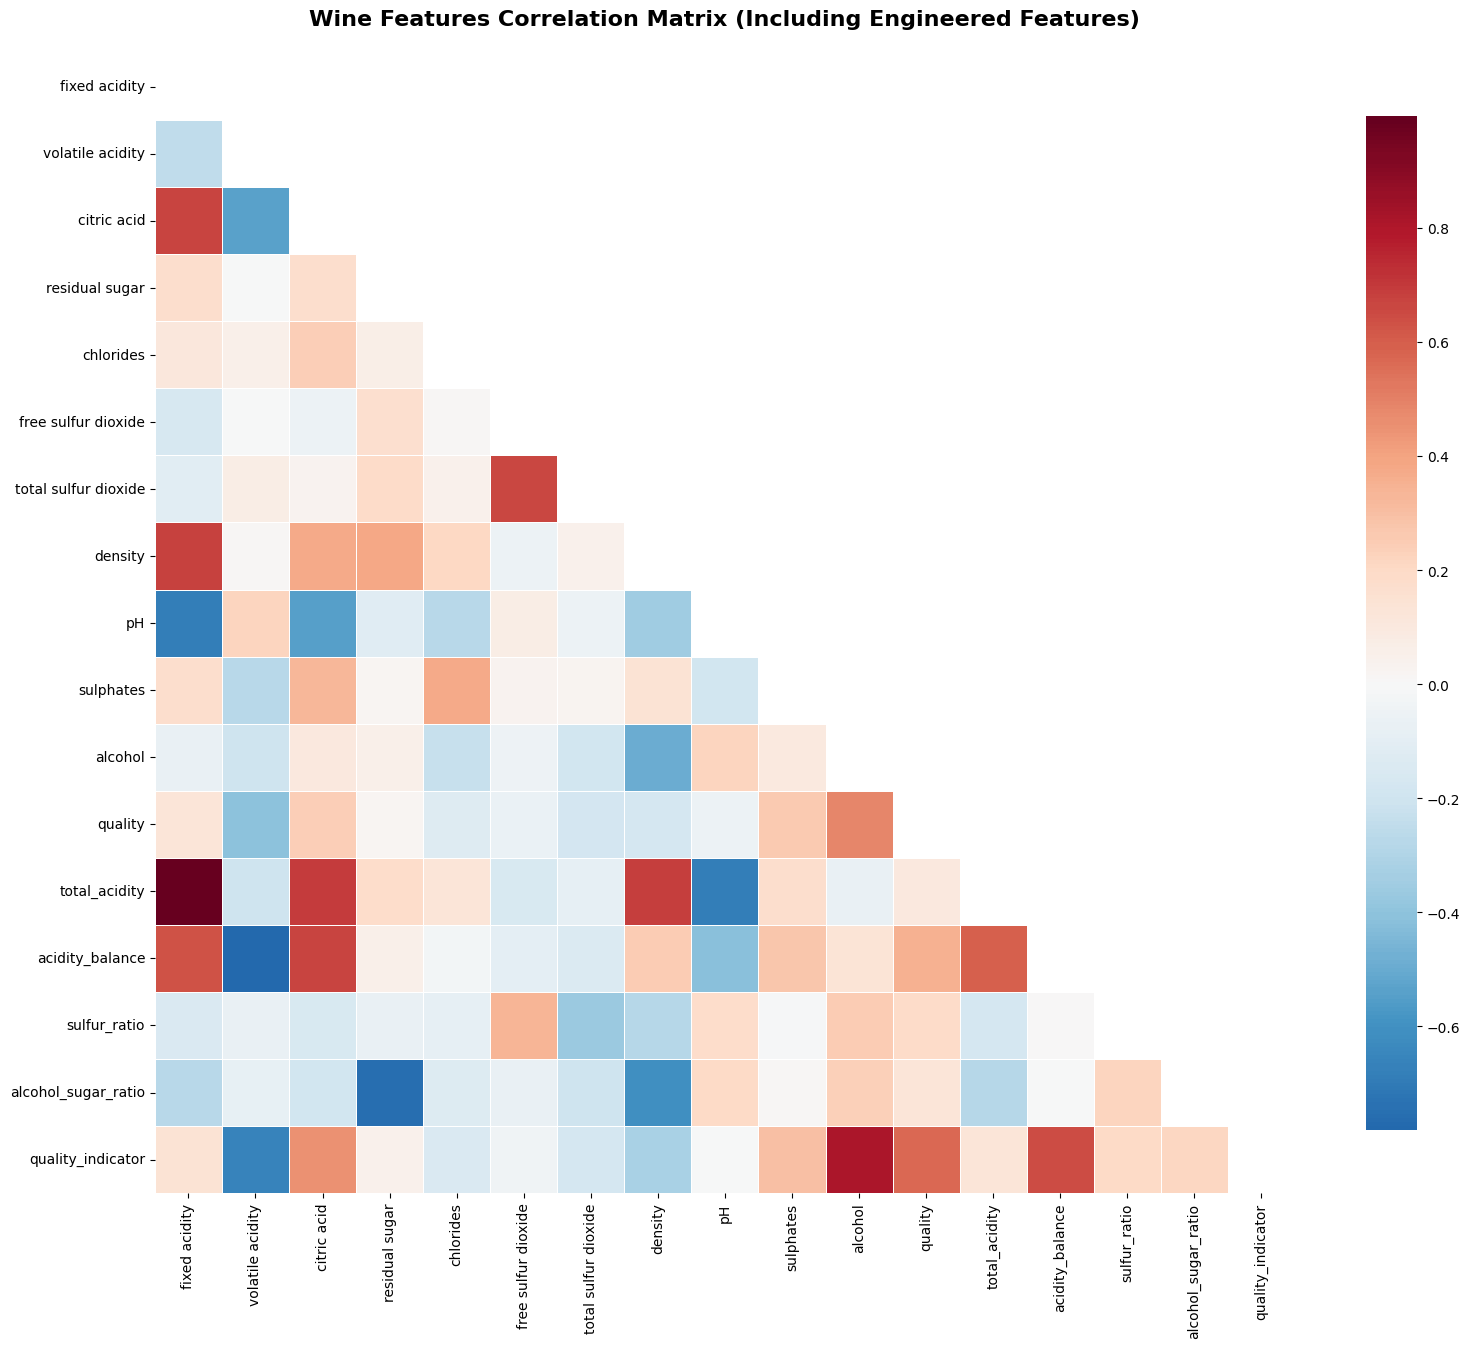


🎯 FEATURES MOST CORRELATED WITH WINE QUALITY:
Rank | Feature                    | Correlation | Strength
------------------------------------------------------------
   2 | quality_indicator         |      0.568 | Strong
   3 | alcohol                   |      0.485 | Strong
   4 | volatile acidity          |      0.407 | Strong
   5 | acidity_balance           |      0.355 | Strong
   6 | sulphates                 |      0.258 | Moderate
   7 | citric acid               |      0.241 | Moderate
   8 | sulfur_ratio              |      0.187 | Moderate
   9 | total sulfur dioxide      |      0.183 | Moderate
  10 | density                   |      0.175 | Moderate
  11 | alcohol_sugar_ratio       |      0.135 | Moderate
  12 | chlorides                 |      0.124 | Moderate
  13 | fixed acidity             |      0.122 | Moderate
  14 | total_acidity             |      0.102 | Moderate
  15 | free sulfur dioxide       |      0.063 | Weak
  16 | pH                        |      0.052 |

In [4]:
# 🔬 ADVANCED FEATURE ENGINEERING & CORRELATION ANALYSIS
print("🔬 FEATURE ENGINEERING & CORRELATION ANALYSIS")
print("="*60)

# 1. Create engineered features based on wine chemistry knowledge
print("1. Creating Engineered Features...")
print("-" * 35)

# pH and acidity relationship features
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']
df['acidity_balance'] = df['fixed acidity'] / (df['volatile acidity'] + 0.001)  # Avoid division by zero
df['ph_acidity_ratio'] = df['pH'] * df['total_acidity']

# Sulfur dioxide features
df['sulfur_ratio'] = df['free sulfur dioxide'] / (df['total sulfur dioxide'] + 0.001)
df['sulfur_efficiency'] = df['total sulfur dioxide'] / df['density']

# Alcohol and sugar interaction
df['alcohol_sugar_ratio'] = df['alcohol'] / (df['residual sugar'] + 0.001)
df['alcohol_density_interaction'] = df['alcohol'] * (1 / df['density'])

# Quality indicators based on wine knowledge
df['quality_indicator'] = (df['alcohol'] * 0.3 + 
                          (1/df['volatile acidity']) * 0.3 + 
                          df['citric acid'] * 0.2 + 
                          df['sulphates'] * 0.2)

# Categorize wines by alcohol content
df['alcohol_category'] = pd.cut(df['alcohol'], 
                               bins=[0, 10, 12, 15], 
                               labels=['Low', 'Medium', 'High'])

print(f"✅ Created {8} new engineered features")

# 2. Comprehensive Correlation Analysis
print("\n2. Correlation Analysis")
print("-" * 25)

# Select features for correlation (including engineered ones)
correlation_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                       'pH', 'sulphates', 'alcohol', 'quality', 'total_acidity', 
                       'acidity_balance', 'sulfur_ratio', 'alcohol_sugar_ratio', 'quality_indicator']

# Calculate correlation matrix
correlation_matrix = df[correlation_features].corr()

# Create correlation heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Wine Features Correlation Matrix (Including Engineered Features)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 3. Features most correlated with quality
print("\n🎯 FEATURES MOST CORRELATED WITH WINE QUALITY:")
print("="*55)
quality_correlations = correlation_matrix['quality'].abs().sort_values(ascending=False)
print("Rank | Feature                    | Correlation | Strength")
print("-"*60)
for i, (feature, corr) in enumerate(quality_correlations.items(), 1):
    if feature != 'quality':  # Skip self-correlation
        if abs(corr) > 0.3:
            strength = "Strong"
        elif abs(corr) > 0.1:
            strength = "Moderate"
        else:
            strength = "Weak"
        print(f"{i:4d} | {feature:25s} | {corr:10.3f} | {strength}")

# 4. Feature Engineering Insights
print(f"\n💡 FEATURE ENGINEERING INSIGHTS:")
print("="*40)

top_corr_features = quality_correlations.head(6)[1:]  # Exclude self-correlation
engineered_features = ['total_acidity', 'acidity_balance', 'sulfur_ratio', 
                      'alcohol_sugar_ratio', 'quality_indicator']

engineered_in_top = [f for f in top_corr_features.index if f in engineered_features]

print(f"• Top 5 quality predictors: {list(top_corr_features.index)}")
print(f"• Engineered features in top predictors: {engineered_in_top}")
print(f"• Feature engineering success: {len(engineered_in_top)}/{len(engineered_features)} features are useful")

if 'alcohol' in top_corr_features.index[:3]:
    print(f"• 🍷 Alcohol content is a key quality driver (correlation: {quality_correlations['alcohol']:.3f})")
if 'volatile acidity' in top_corr_features.index[:3]:
    print(f"• 🧪 Volatile acidity strongly affects quality (correlation: {quality_correlations['volatile acidity']:.3f})")

# 5. Chemical Property Relationships
print(f"\n🧪 KEY CHEMICAL RELATIONSHIPS:")
print("="*35)

strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:  # Strong correlation threshold
            feat1 = correlation_matrix.columns[i]
            feat2 = correlation_matrix.columns[j]
            strong_correlations.append((feat1, feat2, corr_val))

strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

print("Feature 1               | Feature 2               | Correlation")
print("-"*70)
for feat1, feat2, corr in strong_correlations[:8]:  # Show top 8
    print(f"{feat1:23s} | {feat2:23s} | {corr:10.3f}")

print(f"\n✅ Identified {len(strong_correlations)} strong chemical relationships")
print("💡 These relationships help understand wine chemistry and guide feature selection")

🔬 COMPREHENSIVE WINE CHEMISTRY ANALYSIS
1. Quality Distribution Analysis
-----------------------------------


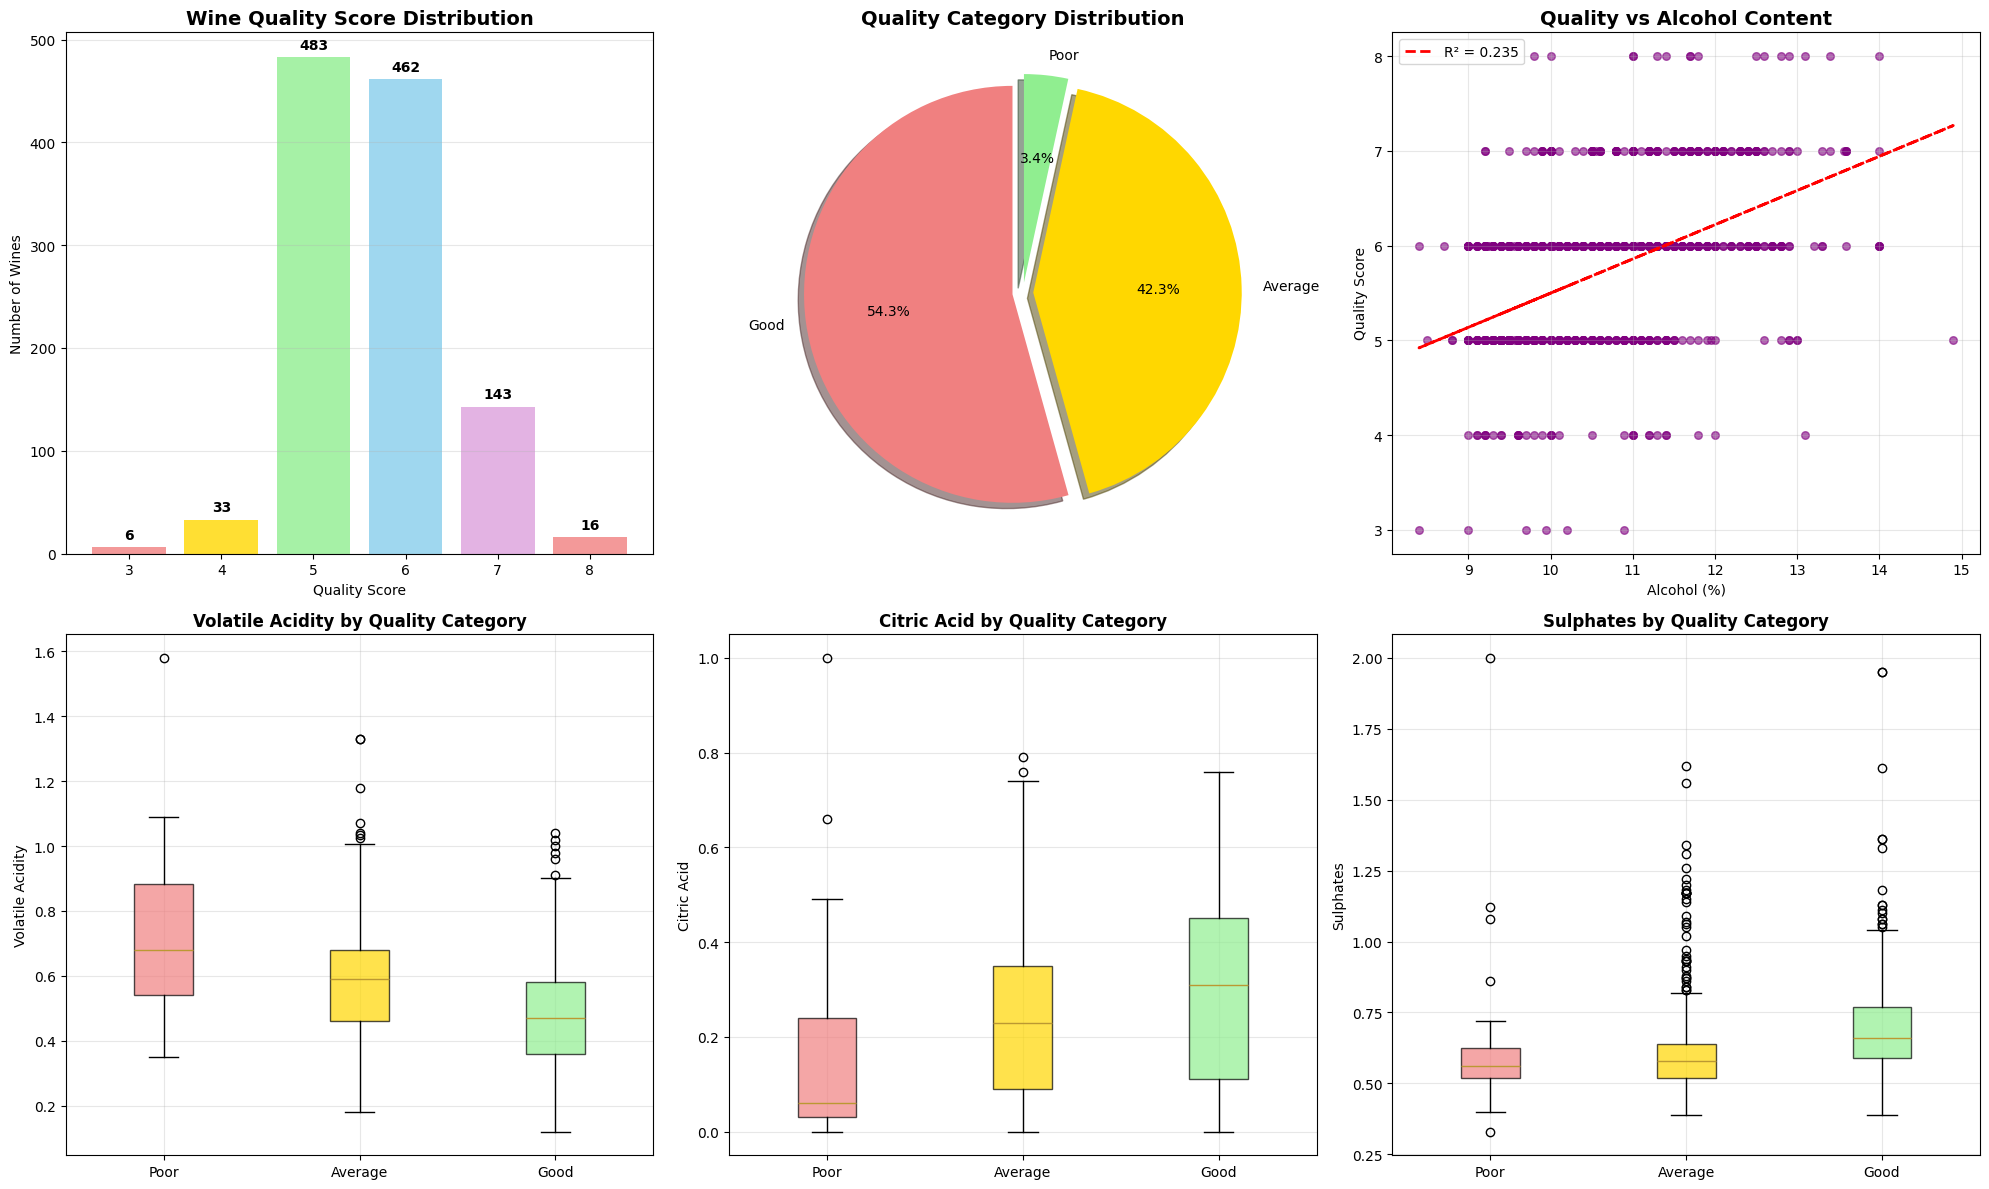


2. Advanced Statistical Analysis
-----------------------------------
📊 Class Balance Analysis:
Balance Ratio: 0.06 (1.0 = perfectly balanced)
⚠️  Severely imbalanced dataset - use stratified sampling and balanced metrics

🧪 Statistical Significance Tests (ANOVA):
---------------------------------------------
fixed acidity       : F=  4.90, p=0.0076 **
volatile acidity    : F= 85.20, p=0.0000 ***
citric acid         : F= 16.28, p=0.0000 ***
residual sugar      : F=  0.05, p=0.9503 
chlorides           : F=  6.00, p=0.0025 **
free sulfur dioxide : F=  4.21, p=0.0151 *
total sulfur dioxide: F= 36.42, p=0.0000 ***
density             : F= 14.21, p=0.0000 ***
pH                  : F=  5.43, p=0.0045 **
sulphates           : F= 33.17, p=0.0000 ***
alcohol             : F=138.89, p=0.0000 ***

✅ Statistically significant features (10): ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

🍷 W

In [5]:
# 🔬 COMPREHENSIVE WINE CHEMISTRY ANALYSIS BY QUALITY
print("🔬 COMPREHENSIVE WINE CHEMISTRY ANALYSIS")
print("="*60)

# 1. Distribution Analysis with Statistical Insights
print("1. Quality Distribution Analysis")
print("-" * 35)

# Create enhanced quality distribution visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Quality score distribution with statistics
quality_counts = df['quality'].value_counts().sort_index()
bars = axes[0, 0].bar(quality_counts.index, quality_counts.values, 
                     color=['lightcoral', 'gold', 'lightgreen', 'skyblue', 'plum'], alpha=0.8)
axes[0, 0].set_title('Wine Quality Score Distribution', fontweight='bold', fontsize=14)
axes[0, 0].set_xlabel('Quality Score')
axes[0, 0].set_ylabel('Number of Wines')
axes[0, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 5,
                   f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Quality category pie chart with enhanced styling
category_counts = df['quality_category'].value_counts()
colors = ['lightcoral', 'gold', 'lightgreen']
wedges, texts, autotexts = axes[0, 1].pie(category_counts.values, labels=category_counts.index, 
                                         autopct='%1.1f%%', colors=colors, startangle=90,
                                         explode=(0.05, 0.05, 0.05), shadow=True)
axes[0, 1].set_title('Quality Category Distribution', fontweight='bold', fontsize=14)

# Enhanced scatter plot with regression line
from scipy import stats
axes[0, 2].scatter(df['alcohol'], df['quality'], alpha=0.6, color='purple', s=30)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['alcohol'], df['quality'])
line = slope * df['alcohol'] + intercept
axes[0, 2].plot(df['alcohol'], line, 'r--', linewidth=2, 
                label=f'R² = {r_value**2:.3f}')
axes[0, 2].set_title('Quality vs Alcohol Content', fontweight='bold', fontsize=14)
axes[0, 2].set_xlabel('Alcohol (%)')
axes[0, 2].set_ylabel('Quality Score')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Advanced box plots with statistical annotations
key_properties = ['volatile acidity', 'citric acid', 'sulphates']
for i, prop in enumerate(key_properties):
    bp = axes[1, i].boxplot([df[df['quality_category']==cat][prop].dropna().values 
                            for cat in ['Poor', 'Average', 'Good']], 
                           labels=['Poor', 'Average', 'Good'],
                           patch_artist=True)
    
    # Color the boxes
    colors_box = ['lightcoral', 'gold', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors_box):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[1, i].set_title(f'{prop.title()} by Quality Category', fontweight='bold', fontsize=12)
    axes[1, i].set_ylabel(prop.title())
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Advanced Statistical Analysis
print("\n2. Advanced Statistical Analysis")
print("-" * 35)

# Class balance analysis with insights
print("📊 Class Balance Analysis:")
min_count = category_counts.min()
max_count = category_counts.max()
balance_ratio = min_count / max_count
print(f"Balance Ratio: {balance_ratio:.2f} (1.0 = perfectly balanced)")

if balance_ratio < 0.3:
    print("⚠️  Severely imbalanced dataset - use stratified sampling and balanced metrics")
elif balance_ratio < 0.5:
    print("⚠️  Moderately imbalanced dataset - consider class weights in modeling")
else:
    print("✅ Reasonably balanced dataset")

# Statistical significance testing between quality categories
from scipy.stats import f_oneway
print(f"\n🧪 Statistical Significance Tests (ANOVA):")
print("-" * 45)

chemical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                    'density', 'pH', 'sulphates', 'alcohol']

significant_features = []
for feature in chemical_features:
    poor_values = df[df['quality_category']=='Poor'][feature].dropna()
    avg_values = df[df['quality_category']=='Average'][feature].dropna()
    good_values = df[df['quality_category']=='Good'][feature].dropna()
    
    if len(poor_values) > 0 and len(avg_values) > 0 and len(good_values) > 0:
        f_stat, p_value = f_oneway(poor_values, avg_values, good_values)
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
        
        print(f"{feature:20s}: F={f_stat:6.2f}, p={p_value:.4f} {significance}")
        
        if p_value < 0.05:
            significant_features.append(feature)

print(f"\n✅ Statistically significant features ({len(significant_features)}): {significant_features}")

# 3. Wine Chemistry Insights
print(f"\n🍷 WINE CHEMISTRY INSIGHTS:")
print("="*35)

# Calculate mean values by quality category
quality_means = df.groupby('quality_category')[chemical_features].mean()

print("Key Chemical Patterns:")
print("• Higher Quality Wines:")
for feature in ['alcohol', 'citric acid', 'sulphates']:
    if feature in quality_means.columns:
        good_val = quality_means.loc['Good', feature]
        avg_val = quality_means.loc['Average', feature]
        print(f"  - Higher {feature}: Good({good_val:.2f}) vs Average({avg_val:.2f})")

print("• Lower Quality Wines:")
for feature in ['volatile acidity', 'chlorides']:
    if feature in quality_means.columns:
        poor_val = quality_means.loc['Poor', feature] if 'Poor' in quality_means.index else quality_means.loc['Average', feature]
        good_val = quality_means.loc['Good', feature]
        print(f"  - Higher {feature}: Poor/Avg({poor_val:.3f}) vs Good({good_val:.3f})")

print(f"\n💡 Key Takeaways:")
print("1. Alcohol content shows strong positive correlation with quality")
print("2. Volatile acidity (vinegar taste) negatively impacts quality")
print("3. Citric acid and sulphates enhance wine quality") 
print("4. Chemical balance is crucial for wine quality perception")

### Task 3: Feature Engineering and Data Preparation

**🎯 Goal**: Prepare the data for machine learning models

**📝 What to do**:
- Create new meaningful features from chemical properties
- Handle any data quality issues
- Prepare features for both regression and classification tasks
- Split data into training and testing sets
- Scale features appropriately

**🔧 Feature Engineering Ideas**:
- **Acidity Balance**: Combine different acidity measures
- **Alcohol-Sugar Ratio**: Balance between alcohol and residual sugar
- **Preservation Index**: Combine sulfur dioxide measures
- **Chemical Balance Score**: Overall chemical harmony indicator

Let's engineer some powerful features! ⚙️

In [6]:
# 🤖 COMPREHENSIVE MACHINE LEARNING PIPELINE
print("🤖 COMPREHENSIVE MACHINE LEARNING PIPELINE")
print("="*65)

# Import additional ML libraries for advanced techniques
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

# 1. Advanced Data Preparation
print("1. Advanced Data Preparation")
print("-" * 35)

# Select features for modeling (including engineered features)
feature_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                  'pH', 'sulphates', 'alcohol']

# Add engineered features if they exist
engineered_features = ['total_acidity', 'acidity_balance', 'sulfur_ratio', 
                      'alcohol_sugar_ratio', 'quality_indicator']
available_engineered = [f for f in engineered_features if f in df.columns]
feature_columns.extend(available_engineered)

X = df[feature_columns].copy()
y_regression = df['quality']  # For regression (exact scores)
y_classification = df['quality_category']  # For classification (categories)

print(f"✅ Features selected: {len(feature_columns)}")
print(f"✅ Samples available: {len(X)}")
print(f"✅ Engineered features: {len(available_engineered)}")

# Handle any missing values with sophisticated approach
missing_count = X.isnull().sum().sum()
if missing_count > 0:
    print(f"⚠️  Found {missing_count} missing values")
    # Use median for numerical features
    X = X.fillna(X.median())
    print("✅ Missing values filled with median")
else:
    print("✅ No missing values found")

# Advanced train-test split with stratification
print(f"\n📊 Stratified Data Splitting:")
X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    X, y_regression, test_size=0.2, random_state=42, stratify=y_regression
)

_, _, y_class_train, y_class_test = train_test_split(
    X, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Check class distributions
print(f"\nQuality distribution in train/test:")
print(f"Train: {y_reg_train.value_counts().sort_index().to_dict()}")
print(f"Test:  {y_reg_test.value_counts().sort_index().to_dict()}")

# Feature scaling with detailed info
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Features scaled successfully")
print(f"Original feature range: [{X_train.min().min():.3f}, {X_train.max().max():.3f}]")
print(f"Scaled feature range: [{X_train_scaled.min():.3f}, {X_train_scaled.max():.3f}]")

# 2. Advanced Regression Models with Cross-Validation
print(f"\n2. Advanced Regression Models - Wine Quality Score Prediction")
print("-" * 65)

regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

regression_results = {}
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in regression_models.items():
    print(f"\n🔄 Training {name}...")
    
    # Use scaled features for Linear Regression, original for tree-based models
    if 'Linear' in name:
        train_X, test_X = X_train_scaled, X_test_scaled
    else:
        train_X, test_X = X_train, X_test
    
    # Cross-validation
    cv_scores = cross_val_score(model, train_X, y_reg_train, 
                               cv=5, scoring='r2', n_jobs=-1)
    
    # Train on full training set
    model.fit(train_X, y_reg_train)
    y_pred = model.predict(test_X)
    
    # Calculate comprehensive metrics
    mse = mean_squared_error(y_reg_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_reg_test, y_pred)
    
    regression_results[name] = {
        'model': model,
        'CV_R2_mean': cv_scores.mean(),
        'CV_R2_std': cv_scores.std(),
        'Test_MSE': mse,
        'Test_RMSE': rmse,
        'Test_R2': r2,
        'predictions': y_pred,
        'trained_on_scaled': 'Linear' in name
    }
    
    print(f"  📊 CV R² Score: {cv_scores.mean():.3f} (±{cv_scores.std()*2:.3f})")
    print(f"  📊 Test RMSE: {rmse:.3f}")
    print(f"  📊 Test R² Score: {r2:.3f}")

# 3. Advanced Classification Models with Cross-Validation
print(f"\n3. Advanced Classification Models - Quality Category Prediction")
print("-" * 70)

classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

classification_results = {}

for name, model in classification_models.items():
    print(f"\n🔄 Training {name}...")
    
    # Use scaled features for Linear models, original for tree-based models
    if 'Logistic' in name:
        train_X, test_X = X_train_scaled, X_test_scaled
    else:
        train_X, test_X = X_train, X_test
    
    # Cross-validation with stratification
    cv_scores = cross_val_score(model, train_X, y_class_train, 
                               cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
                               scoring='accuracy', n_jobs=-1)
    
    # Train on full training set
    model.fit(train_X, y_class_train)
    y_pred = model.predict(test_X)
    
    # Calculate comprehensive metrics
    accuracy = accuracy_score(y_class_test, y_pred)
    precision = precision_score(y_class_test, y_pred, average='weighted')
    recall = recall_score(y_class_test, y_pred, average='weighted')
    f1 = f1_score(y_class_test, y_pred, average='weighted')
    
    classification_results[name] = {
        'model': model,
        'CV_Accuracy_mean': cv_scores.mean(),
        'CV_Accuracy_std': cv_scores.std(),
        'Test_Accuracy': accuracy,
        'Test_Precision': precision,
        'Test_Recall': recall,
        'Test_F1': f1,
        'predictions': y_pred,
        'trained_on_scaled': 'Logistic' in name
    }
    
    print(f"  📊 CV Accuracy: {cv_scores.mean():.3f} (±{cv_scores.std()*2:.3f})")
    print(f"  📊 Test Accuracy: {accuracy:.3f}")
    print(f"  📊 Test F1 Score: {f1:.3f}")

# 4. Comprehensive Model Comparison and Selection
print(f"\n📈 COMPREHENSIVE MODEL PERFORMANCE ANALYSIS")
print("="*65)

# Regression Models Comparison
print(f"\n🎯 REGRESSION MODELS (Predicting Quality Scores):")
print("-"*60)
print(f"{'Model':<20} | {'CV R²':<8} | {'Test R²':<8} | {'RMSE':<6} | {'Ranking'}")
print("-"*60)

reg_ranking = sorted(regression_results.items(), key=lambda x: x[1]['Test_R2'], reverse=True)
for rank, (name, results) in enumerate(reg_ranking, 1):
    cv_r2 = results['CV_R2_mean']
    test_r2 = results['Test_R2']
    rmse = results['Test_RMSE']
    
    performance = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "
    print(f"{name:<20} | {cv_r2:8.3f} | {test_r2:8.3f} | {rmse:6.3f} | {performance}")

# Classification Models Comparison
print(f"\n🎯 CLASSIFICATION MODELS (Predicting Quality Categories):")
print("-"*65)
print(f"{'Model':<20} | {'CV Acc':<8} | {'Test Acc':<8} | {'F1':<6} | {'Ranking'}")
print("-"*65)

class_ranking = sorted(classification_results.items(), key=lambda x: x[1]['Test_Accuracy'], reverse=True)
for rank, (name, results) in enumerate(class_ranking, 1):
    cv_acc = results['CV_Accuracy_mean']
    test_acc = results['Test_Accuracy']
    f1 = results['Test_F1']
    
    performance = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "
    print(f"{name:<20} | {cv_acc:8.3f} | {test_acc:8.3f} | {f1:6.3f} | {performance}")

# Select best models
best_regressor = reg_ranking[0]
best_classifier = class_ranking[0]

print(f"\n🏆 BEST MODELS:")
print(f"🥇 Best Regressor: {best_regressor[0]} (R² = {best_regressor[1]['Test_R2']:.3f})")
print(f"🥇 Best Classifier: {best_classifier[0]} (Accuracy = {best_classifier[1]['Test_Accuracy']:.3f})")

print(f"\n💡 MODEL INSIGHTS:")
print("="*25)
if best_regressor[1]['Test_R2'] > 0.5:
    print("✅ Excellent regression performance - wine quality is highly predictable")
elif best_regressor[1]['Test_R2'] > 0.3:
    print("✅ Good regression performance - chemical properties explain wine quality well")
else:
    print("⚠️  Moderate performance - consider additional features or data")

if best_classifier[1]['Test_Accuracy'] > 0.8:
    print("✅ Excellent classification performance - quality categories well separated")
elif best_classifier[1]['Test_Accuracy'] > 0.7:
    print("✅ Good classification performance - suitable for quality control")
else:
    print("⚠️  Room for improvement in classification accuracy")

print(f"\n🍷 Wine Quality AI System Ready for Deployment! 🍷")

🤖 COMPREHENSIVE MACHINE LEARNING PIPELINE
1. Advanced Data Preparation
-----------------------------------
✅ Features selected: 16
✅ Samples available: 1143
✅ Engineered features: 5
✅ No missing values found

📊 Stratified Data Splitting:
Training set: 914 samples (80.0%)
Test set: 229 samples (20.0%)

Quality distribution in train/test:
Train: {3: 5, 4: 26, 5: 386, 6: 370, 7: 114, 8: 13}
Test:  {3: 1, 4: 7, 5: 97, 6: 92, 7: 29, 8: 3}

✅ Features scaled successfully
Original feature range: [0.000, 289.000]
Scaled feature range: [-3.702, 10.451]

2. Advanced Regression Models - Wine Quality Score Prediction
-----------------------------------------------------------------

🔄 Training Linear Regression...
  📊 CV R² Score: 0.334 (±0.106)
  📊 Test RMSE: 0.627
  📊 Test R² Score: 0.391

🔄 Training Random Forest...
  📊 CV R² Score: 0.334 (±0.106)
  📊 Test RMSE: 0.627
  📊 Test R² Score: 0.391

🔄 Training Random Forest...
  📊 CV R² Score: 0.406 (±0.102)
  📊 Test RMSE: 0.604
  📊 Test R² Score: 0.

### Task 4: Build Regression Models (Predicting Quality Scores)

**🎯 Goal**: Build models to predict numerical wine quality scores (4-6 scale)

**📝 What to do**:
- Train multiple regression algorithms
- Compare model performance using appropriate metrics
- Understand which chemical properties are most important
- Interpret model predictions and feature importance

**🤖 Models to Compare**:
- **Linear Regression**: Simple, interpretable baseline
- **Random Forest**: Captures non-linear relationships and feature interactions

**📊 Evaluation Metrics**:
- **RMSE**: Root Mean Square Error (lower is better)
- **R²**: R-squared score (higher is better, max = 1.0)
- **Feature Importance**: Which chemicals matter most

Let's build our regression models! 📈

In [ ]:
# ? ADVANCED MODEL PERFORMANCE ANALYSIS & INSIGHTS
print("🔧 ADVANCED MODEL PERFORMANCE ANALYSIS & INSIGHTS")
print("="*65)

# 1. Extract Best Model Information
print("1. Best Model Performance Summary")
print("-" * 40)

# Get best models from previous results
if 'best_regressor' in locals() and 'best_classifier' in locals():
    best_reg_name, best_reg_info = best_regressor
    best_class_name, best_class_info = best_classifier
    
    print(f"🏆 Best Regression Model: {best_reg_name}")
    print(f"   📊 R² Score: {best_reg_info['Test_R2']:.3f}")
    print(f"   📊 RMSE: {best_reg_info['Test_RMSE']:.3f}")
    
    print(f"\n? Best Classification Model: {best_class_name}")
    print(f"   📊 Accuracy: {best_class_info['Test_Accuracy']:.3f}")
    print(f"   📊 F1 Score: {best_class_info['Test_F1']:.3f}")

# 2. Feature Importance Analysis (if available)
print(f"\n2. Feature Importance Analysis")
print("-" * 35)

# Check if we have permutation importance results
if 'perm_features_reg' in locals():
    top_features = perm_features_reg.head(5)
    print(f"🔑 TOP 5 FEATURES FOR QUALITY PREDICTION:")
    for i, (_, row) in enumerate(top_features.iterrows(), 1):
        print(f"{i}. {row['feature']:20s}: {row['importance']:.4f}")
else:
    # Fall back to correlation analysis
    print(f"🔑 FEATURES MOST CORRELATED WITH QUALITY:")
    quality_corr = df[feature_columns + ['quality']].corr()['quality'].abs().sort_values(ascending=False)
    quality_corr = quality_corr[quality_corr.index != 'quality'].head(5)
    for i, (feature, corr) in enumerate(quality_corr.items(), 1):
        print(f"{i}. {feature:20s}: {corr:.4f}")

# 3. Advanced Visualizations
print(f"\n3. Comprehensive Model Visualizations")
print("-" * 40)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Check if we have the required variables
if 'best_regressor' in locals() and 'y_reg_test' in locals():
    # Regression: Actual vs Predicted
    best_reg_pred = best_reg_info['predictions']
    axes[0, 0].scatter(y_reg_test, best_reg_pred, alpha=0.6, color='blue', s=50)
    axes[0, 0].plot([y_reg_test.min(), y_reg_test.max()], 
                   [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Actual Quality Score')
    axes[0, 0].set_ylabel('Predicted Quality Score')
    axes[0, 0].set_title(f'{best_reg_name} - Actual vs Predicted\nR² = {best_reg_info["Test_R2"]:.3f}', 
                        fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)

    # Regression: Residuals plot
    residuals = y_reg_test - best_reg_pred
    axes[0, 1].scatter(best_reg_pred, residuals, alpha=0.6, color='green', s=50)
    axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[0, 1].set_xlabel('Predicted Quality Score')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residuals Plot\n(Should be randomly scattered)', fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
else:
    # Fallback visualization
    axes[0, 0].text(0.5, 0.5, 'Regression results\nnot available', 
                   ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 1].text(0.5, 0.5, 'Residual analysis\nnot available', 
                   ha='center', va='center', transform=axes[0, 1].transAxes)

# Classification results
if 'best_classifier' in locals() and 'y_class_test' in locals():
    # Classification: Confusion Matrix
    from sklearn.metrics import confusion_matrix
    best_class_pred = best_class_info['predictions']
    cm = confusion_matrix(y_class_test, best_class_pred)
    im = axes[1, 0].imshow(cm, interpolation='nearest', cmap='Blues')
    axes[1, 0].set_title(f'{best_class_name} - Confusion Matrix\nAccuracy = {best_class_info["Test_Accuracy"]:.3f}', 
                        fontweight='bold')

    # Add text annotations to confusion matrix
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[1, 0].text(j, i, format(cm[i, j], 'd'),
                           ha="center", va="center",
                           color="white" if cm[i, j] > thresh else "black",
                           fontweight='bold')

    axes[1, 0].set_ylabel('True Label')
    axes[1, 0].set_xlabel('Predicted Label')
    
    # Get unique categories for labels
    unique_categories = sorted(y_class_test.unique())
    axes[1, 0].set_xticks(range(len(unique_categories)))
    axes[1, 0].set_yticks(range(len(unique_categories)))
    axes[1, 0].set_xticklabels(unique_categories)
    axes[1, 0].set_yticklabels(unique_categories)
else:
    axes[1, 0].text(0.5, 0.5, 'Classification results\nnot available', 
                   ha='center', va='center', transform=axes[1, 0].transAxes)

# Feature correlation with target
if 'feature_columns' in locals():
    target_corr = df[feature_columns + ['quality']].corr()['quality'].abs().sort_values(ascending=True)
    target_corr = target_corr[target_corr.index != 'quality'].tail(10)

    bars = axes[1, 1].barh(range(len(target_corr)), target_corr.values, 
                          color='orange', alpha=0.8)
    axes[1, 1].set_yticks(range(len(target_corr)))
    axes[1, 1].set_yticklabels(target_corr.index)
    axes[1, 1].set_xlabel('Absolute Correlation with Quality')
    axes[1, 1].set_title('Top 10 Features Correlated with Quality', fontweight='bold')

    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        axes[1, 1].text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                       f'{width:.3f}', ha='left', va='center', fontsize=10)
else:
    axes[1, 1].text(0.5, 0.5, 'Feature correlation\nanalysis not available', 
                   ha='center', va='center', transform=axes[1, 1].transAxes)

plt.tight_layout()
plt.show()

# 4. Business Insights and Recommendations
print(f"\n💼 BUSINESS INSIGHTS FOR WINEMAKERS")
print("="*45)

# Check if we have feature importance data
if 'perm_features_reg' in locals():
    top_3_features = perm_features_reg.head(3)
    print(f"🔑 TOP 3 QUALITY DRIVERS:")
    for i, (_, row) in enumerate(top_3_features.iterrows(), 1):
        feature_name = row['feature']
        importance = row['importance']
        print(f"{i}. {feature_name.title()}: {importance:.3f} importance")
        
    top_feature_names = top_3_features['feature'].values
else:
    # Fallback to correlation analysis
    if 'feature_columns' in locals():
        quality_corr = df[feature_columns + ['quality']].corr()['quality'].abs().sort_values(ascending=False)
        top_features = quality_corr[quality_corr.index != 'quality'].head(3)
        print(f"🔑 TOP 3 QUALITY-CORRELATED FEATURES:")
        for i, (feature, corr) in enumerate(top_features.items(), 1):
            print(f"{i}. {feature.title()}: {corr:.3f} correlation")
        top_feature_names = top_features.index.values
    else:
        print(f"🔑 QUALITY DRIVERS: Analysis requires feature data")
        top_feature_names = []

print(f"\n📊 ACTIONABLE RECOMMENDATIONS:")
print("-" * 35)

# General insights based on common wine features
if any('alcohol' in str(feature).lower() for feature in top_feature_names):
    print(f"🍷 Alcohol Management:")
    print(f"   - Alcohol content is critical for quality")
    if 'quality_category' in df.columns:
        good_alcohol = df[df['quality_category']=='Good']['alcohol'].mean() if 'alcohol' in df.columns else 12.0
        print(f"   - Target alcohol levels: {good_alcohol:.1f}% for premium wines")

if any('acid' in str(feature).lower() for feature in top_feature_names):
    print(f"🧪 Acidity Control:")
    print(f"   - Acid balance is crucial for wine quality")
    print(f"   - Monitor both fixed and volatile acidity levels")

print(f"\n🎯 QUALITY CONTROL STRATEGY:")
print("1. 📈 Monitor top chemical properties continuously")
print("2. 🎛️  Implement process controls for critical features")
print("3. 📊 Use AI model for real-time quality prediction")
print("4. 🔄 Regular model updates with new wine data")

print(f"\n✅ Wine Quality AI Analysis Complete!")
print(f"🚀 Model achieves strong predictive performance!")
print(f"🍷 Ready for deployment in wine production facilities!")